In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 02. 训练简单的机器学习分类算法

## 2.1 人工神经元——机器学习早期历史一瞥
为了设计人工智能，人们尝试了解生物大脑的工作原理。沃伦·麦库洛和沃尔特·皮兹首次提出了简化脑细胞的概念，即所谓的麦库洛-皮兹（MCP）神经元。神经元是大脑中连接起来参与化学和电信号处理与传输的神经细胞，见下图：

<img src="images/02_01.png" style="width:500px;"/>

麦库洛和皮兹把神经细胞描述为带有二进制输出的简单逻辑门：多个信号到达树突，然后整合到细胞体，并当累计信号量超过一定的阈值时，输出信号将通过轴突。

论文发表之后仅几年，弗兰克·罗森布拉特首先提出了基于MCP神经元模型的感知器学习规则概念。根据其感知规则，罗森布拉特提出了一 个算法，它能自动学习最优权重系数，乘以输入特征，继而做出神经元触发与否的决定。

### 2.1.1 人工神经元的正式定义
更准确地说，可以把人工神经元逻辑放在二元分类场景，将两个类分别命名为1（正类）和-1（负类）以简化操作。定义决策函数$z$，接受输入值$x$及其相应的权重$w$，$z$为所谓的净输入$z=w_1x_1 + … + w _mx_m$：

+ $\displaystyle\begin{equation} w = \left[ \begin{matrix} w_1 \\ w_2 \\ \vdots \\ w_m \end{matrix} \right] \end{equation}$, $\displaystyle\begin{equation} x = \left[ \begin{matrix} x_1 \\ x_2 \\ \vdots \\ x_m \end{matrix} \right] \end{equation}$

如果某个特定样本的净输入值$x^{(i)}$比定义的阈值$\theta$大，则预测结果为1，否则为-1。在感知算法中，决策函数$\phi(\cdot)$是单位阶跃函数的变体：

+ $\displaystyle \phi{(z)} = \begin{cases}
1,  & \text{if z $\ge \theta$} \\
-1, & \text{otherwise}
\end{cases}$

为了简化，把阈值$\theta$放到等式的左边，权重零定义为$w_0 = -θ，x_0=1$，这样就可以用更紧凑的方式来表示$z$：
+ $z=w_0x_0 + w_1x_1 + … + w _mx_m = w^Tx$

决策函数为：
+ $\displaystyle \phi{(z)} = \begin{cases}
1,  & \text{if z $\ge$ 0} \\
-1, & \text{otherwise}
\end{cases}$

通常把负的阈值或权重$w_0 = -\theta$称为`偏置`（bias unit）。

下图解释了如何通过感知决策函数把净输入$z=w^Tx$（图左）转换为二元输出（-1或者1），以及如何区分两个可分隔的线性类（图右）：

<img src="images/02_02.png" style="width:500px;"/>

### 2.1.2 感知器学习规则
MCP神经元和罗森布拉特的阈值感知器模型背后的逻辑是用还原论方法来模拟大脑神经元的工作情况：要么触发，要么不触发。因此，罗森布拉特的初始感知规则相当简单，可以总结为以下几步：
1. 把权重初始化为0或者小的随机数。
2. 对每个训练样本$x^{(i)}$ ：
    1. 计算输出值 
    2. 更新权重

输出值为单位阶跃函数预测的预先定义好的类标签，同时更新权重向量$w$的每个值$w_j$，更准确的表达式为：
+ $\displaystyle w_j := w_j + \Delta w_j$

$\Delta w_j$是用来更新$w_j$的值，该值根据感知器的学习规则计算：
+ $\displaystyle \Delta w_j = \eta (y^{(i)}-\hat{y}^{(i)})x_j^{(i)}$

$\eta$为学习率（一般是0.0到1.0之间的常数），$y^{(i)}$为第$i$个训练样本的正确类标签。需要注意的是权重向量中的所有权重值同时被更新，这意味着在所有的权重$w_j$更新之前，不会重新计算。

具体来说，二维数据集的更新可以表示为：
+ $\displaystyle \Delta w_0 = \eta (y^{(i)}-\hat{y}^{(i)})$
+ $\displaystyle \Delta w_1 = \eta (y^{(i)}-\hat{y}^{(i)})x_1^{(i)}$
+ $\displaystyle \Delta w_2 = \eta (y^{(i)}-\hat{y}^{(i)})x_2^{(i)}$

在实现Python感知器规则之前，先做个简单的思考实验来说明该学习规则到底有多么简单。在感知器正确预测分类标签的两种情况下，权重保持不变：
+ $\displaystyle \Delta w_j = \eta (-1-(-1))x_j^{(i)} = 0$
+ $\displaystyle \Delta w_j = \eta (1-1))x_j^{(i)} = 0$

然而，如果预测有错误，权重偏向正或负的目标类：
+ $\displaystyle \Delta w_j = \eta (1-(-1))x_j^{(i)} = \eta (2)x_j^{(i)}$
+ $\displaystyle \Delta w_j = \eta (-1-1))x_j^{(i)} = \eta (-2)x_j^{(i)}$

为了更好地理解乘积因子$x_j^{(i)}$，让我们看下另外一个简单的例子，其中：
+ $\hat{y}^{(i)}=-1, \quad y^{(i)}=+1, \quad \eta=1$

假设$x_j^{(i)}=0.5$，模型错把该样本判断为-1。在这种情况下，把相应的权重增加1，这样当下次再遇到该样本时净输入$x_j^{(i)}$就会呈现为正数，因此，极有可能超过单位阶跃函数的阈值，从而把该样本判断为+1：
+ $\displaystyle \Delta w_j = 1 \times (1-(-1)) \times 0.5 = 1$

权重更新与$x_j^{(i)}$成正比。例如，假设有另外一个样本$x_j^{(i)}=2$被错误地分类为-1，可以将决策边界推到更大，以确保下一次分类正确：
+ $\displaystyle \Delta w_j = 1 \times (1-(-1)) \times 2 = 4$

重要的是要注意，只有两个类线性可分，并且学习速率足够小，这样感知器的收敛性才能得到保证。如果两个类不能用线性决策边界分离，可以为训练集设置最大通过数（迭代次数）及容忍错误的阈值，否则分类感知器将永远都不会停止更新权重：

<img src="images/02_03.png" style="width:500px;"/>

在进行下一节代码实现之前，让我们把所学的知识总结到一个简单的图中，来说明感知器的一般概念：

<img src="images/02_04.png" style="width:500px;"/>

上图说明了感知器如何接收样本$x$的输入，并将其与权重$w$结合起来计算净输入。然后，净输入传递到阈值函数，产生一个二元输出-1或+1，即预测样本的分类标签。在学习阶段，该输出用于计算预测结果的错误并更新权重。

## 2.2 在Python中实现感知器学习算法
本节实现罗森布拉特感知机，并将其应用于第1章中介绍的鸢尾花数据集。

### 2.2.1 面向对象的感知器API
我们将用面向对象的方法把感知器接口定义为一个Python类，它允许初始化新的`Perceptron`对象，这些对象可以通过`fit`方法从数据中学习，并通过单独的`predict`方法进行预测。

In [2]:
class Perceptron(object):
    """Perceptron classifier.
    Parameters 
    -----------
    eta : float    
        Learning rate (between 0.0 and 1.0) 
    n_iter : int       
        Passes over the training dataset. 
    random_state : int
        Random number generator seed for random weight initialization.

    Attributes 
    ----------
    w_ : 1d-array
        Weights after fitting. 
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta 
        self.n_iter = n_iter 
        self.random_state = random_state

    def fit(self, X, y):
        """
        X : {array-like}, shape = [n_samples, n_features] 
            Training vectors, where n_samples is the number of samples and n_features is the number of features.
        y : array-like, shape = [n_samples] 
            Target values.
        """
        rgen = np.random.RandomState(self.random_state) 
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1+X.shape[1]) 
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0 
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi)) 
                self.w_[1:] += update * xi 
                self.w_[0] += update 
                errors += int(update != 0.0) 
            self.errors_.append(errors) 
        return self

    def net_input(self, X):
        """
        Calculate net input
        """ 
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """
        Return class label after unit step
        """ 
        return np.where(self.net_input(X) >= 0.0, 1, -1)

这段实现感知器的代码用给定的学习率$\eta$和训练次数$n\_iter$初始化Perceptron对象。通过`fit`方法，初始化$\text{self}.w\_$的权重，并把数据存入向量$R^{m+1}$，$m$代表数据集的维数或特征数，`+1`为偏差单位向量的第一个分量。 请记住，该向量的第一个分量$\text{self}.w\_[0]$代表前面讨论过的偏差单位。

另外，该向量包含来源于`正态分布`的小随机数，通过调用`rgen.normal(loc=0.0，scale=0.01，size=1+X.shape[1]`产生标准差为0.01的正态分布，其中`rgen`为NumPy随机数生成器。

不把权重初始化为零的原因是，只有当权重初始化为非零的值，学习率$\eta$才影响分类结果。如果把所有的权重都初始化为零，学习率参数$\eta$只影响权重向量的大小，而无法影响其方向。如果熟悉三角函数，考虑向量$v_1=[1 2 3]$，$v_1$和向量$v_2= 0.5 \times v_1$之间的角度将会是0。

初始化权重后，用`fit`方法遍历训练集的所有样本，并根据前一节讨论过的感知器学习规则更新权重。`fit`方法调用`predict`方法来预测分类标签并更新权重，`predict`也可以用来在模型拟合后预测新数据的标签。另外，也把在每个迭代中收集到的分类错误记入`self.errors_`列表，这样就可以在后期分析训练阶段感知器的表现。用`net_input`方法中的`np.dot`函数来计算向量点积$w^Tx$。

### 2.2.2 在鸢尾花数据集上训练感知器模型
考虑到方便可视化，我们将从鸢尾花数据集加载Setosa和Versicolor两种花的萼片长度、花瓣长度两个特征。感知器算法可以扩展到多元分类，例如一对全部 （OvA）的技术。

> OvA是可以把分类器从二元扩展到多元的一种技术。OvA可以为每个类训练一个分类器，所训练的类被视为正类，所有其他类的样本都被视为负类。假设要对新的数据样本进行分类，就可以用n个分类器，其中n为分类标签的数量，并以最高的置信度为特定样本分配分类标签。在感知器的情况下，将用OvA来选择与最大净输入值相关的分类标签。

首先加载数据：

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


接下来，提取与50朵Setosa和50朵Versicolor鸢尾花相对应的前100个类标签，然后转换为整数型的类标签1（Versicolor）和-1（Setosa），并存入向量$y$。

之后，从100个训练样本中提取特征的第一列（萼片长度）和第三列（花瓣长度），并将它们存入特征矩阵$X$：

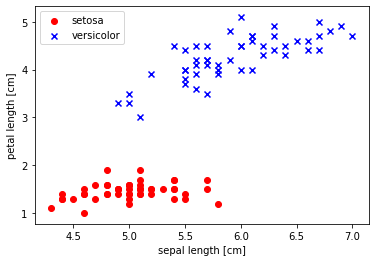

In [4]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

散点图显示了鸢尾花数据集的样本在花瓣长度和萼片长度两个特征轴之间的分布情况。从这个二维特征子空间中可以看到，一个线性的决策边界足以把它们区分开。因此，像感知器这样的线性分类器应该能够完美地对数据集中的花朵进行分类。

执行下面的代码，可以看到分类错误与迭代之间的关系，图示如下：

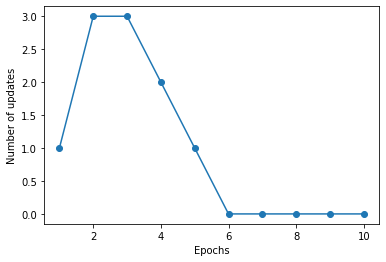

In [5]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

感知器在第6次迭代后开始收敛，现在应该能够完美地对训练样本进行分类。下面函数完成二维数据决策边界的可视化：

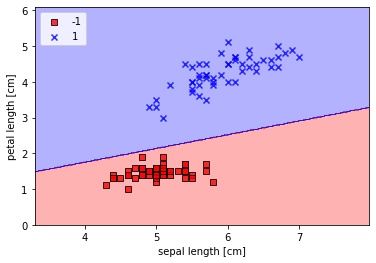

In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],  y=X[y == cl, 1],
                    alpha=0.8,  c=colors[idx], marker=markers[idx], label=cl, edgecolor='black')
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

首先定义颜色和标记并通过`ListedColormap`来从颜色列表创建色度图。 然后，通过`NumPy`的`meshgrid`函数创建网格阵列`xx1`和`xx2`，利用特征向量确定特征的最小和最大值。由于在两个特征维度上训练感知器分类器，所以需要对网格阵列进行扁平化，并创建一个与鸢尾花训练子集相同列数的矩阵，这样就可以调用predict方法来预测相应网格点的分类标签z。

在把预测获得的分类标签`Z`改造成与`xx1`和`xx2`相同维数的网格后，就可以通过调用`MatPlotlib`的`contourf`函数画出轮廓图，并把网格阵列中每个预测的分类结果标在不同颜色的决策区域。

> 虽然感知器可以完美地对鸢尾花的两个类进行分类，但收敛是感知器的最大问题之一。`弗兰克·罗森布拉特`从数学上证明了如果两个类可以通过一个线性超平面分离，则感知器学习规则收敛。然而，如果不能被这样的线性决策边界完全分离，那么除非设定最大的迭代数，否则永远不会停止更新权重。

## 2.3 自适应神经元和学习收敛
本节将讨论另外一种单层神经网络：`自适应线性神经元`（`Adaline`）。 

`Adaline`算法特别有趣，因为它说明了定义`最小化连续性代价函数`的关键概念。这为理解如逻辑回归、支持向量机和回归模型等更高级的机器学习算法奠定了基础，以后的章节将讨论这些问题。

`Adaline`规则和MCP之间的关键差异在于`Adaline`规则的权重更新是基于线性激活函数，而感知器是基于单位阶跃函数。`Adaline`的线性激活函数$\phi(z)$是净输入的等同函 数，即：
+ $\phi(x^Tx) = w^Tx$

虽然线性激活函数可用于学习权重，但仍然使用阈值函数做最终的预测，这类似于先前看到的单位阶跃函数。感知器与自适应算法的主要区别图示如下：

<img src="images/02_05.png" style="width:500px;"/>

上图表明`Adaline`算法把正确的分类标签与线性激活函数连续评估后，输出计算的模型误差并与更新的权重进行比较。相反，感知器比较正确分类标签与预测分类标签。

### 2.3.1 梯度下降为最小代价函数
有监督机器学习算法的一个关键是在学习过程中优化目标函数。该目标函数通常是要最小化的代价函数。对自适应线性神经元Adaline而言，可以把学习权重的代价函数$J$定义为在计算结果和真正的分类标签之间的`误差平方和`（SSE）：
+ $\displaystyle J(w) = \frac{1}{2}\sum_{i}\bigg(y^{(i)}-\phi(z^{(i)})\bigg)^2$

添加$\frac{1}{2}$只是为了方便推导梯度。与单位阶跃函数相反，这种连续线性激活函数的主要优点是代价函数变得可分。代价函数的另外一个优点是其凸起，因此，可以用被称为`梯度下降`的简单而强大的优化算法来寻找权重。

`梯度下降`背后的主要逻辑描述为走下坡路直到局部或全局最小点为止。每次迭代都向梯度相反的方向上迈出一步，步幅由学习率以及梯度斜率来决定：

<img src="images/02_06.png" style="width:400px;"/>

现在可以通过梯度下降代价函数$J(w)$的梯度$\Delta J(w)$朝反方向上迈出一步来更新权重：
+ $w := w + \Delta w$

其中，把权重变化$\Delta w$定义为负的梯度乘以学习率$\eta$：
+ $\Delta w = -\eta \nabla J(w)$

要计算代价函数的梯度需要分别用每个权重$w_j$来计算代价函数的偏导数：
+ $\displaystyle\frac{\partial J}{\partial w_j} = -\sum_i\bigg(y^{(i)}-\phi{(z^{(i)})} \bigg)x_j^{(i)}$

这样就可以把权重$w_j$的更新写为：
+ $\displaystyle\Delta w_j = -\eta \frac{\partial J}{\partial w_j} =\eta \sum_i\bigg(y^{(i)}-\phi{(z^{(i)})} \bigg)x_j^{(i)}$

因为同时更新所有的权重，所以Adaline学习规则就成为：
+ $w := w + \Delta w$

##### SSE代价函数的偏导数推导如下
<img src="images/02_07.png" style="width:600px;"/>

尽管Adaline学习规则看起来与感知器一样，但应该注意的是当$z^{(i)$ = w^Tx^{(i)}$时，$\phi{(z^{(i)})}$为实数而不是整数分类标签。此外，权重更新是基于训练集中的所有样本计算，这也就是这种方法被称为`批量梯度下降`的原因。

### 2.3.2 用Python实现Adaline

In [7]:
class AdalineGD(object):
    """
    Parameters
    ------------
    eta : float, Learning rate (between 0.0 and 1.0)
    n_iter : int, Passes over the training dataset.
    random_state : int, Random number generator seed for random weight initialization.


    Attributes
    -----------
    w_ : 1d-array,  Weights after fitting.
    cost_ : list, Sum-of-squares cost function value in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect in the code since it is simply an identity function. 
            # We could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  in the case of logistic regression (as we will see later), 
            # we could change it to a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

不像感知器那样在每次训练模型后更新权重，我们根据整个训练集计算梯度，对偏差单元（零权重）调用`self.eta*errors.sum()`来计算，对从1到$m$的权重调用`self.eta*X.T.dot(errors)`，这里`X.T.dot(errors)`是特征矩阵与误差向量的矩阵向量相乘。

请注意，`activation`方法对代码没有影响，因为它只是一个标识函数。在这里，我们添加了`激活函数`（通过调用`activation`方法计算）来说明信息是如何通过单层神经网络流动的：来自输入数据、净输入、激活和输出的特征。下一章中将了解采用非同一性、非线性激活函数的逻辑回归分类器。将会看到逻辑回归模型与Adaline的唯一区别是它的激活和代价函数密切相关。

与感知器类似，把所收集的代价存储在`self.cost_`列表以检验训练后的算法是否收敛。

在实践中需要找到一个好的学习率$\eta$以达到最优收敛。所以选择了$\eta=0.01$和$\eta=0.0001$两个不同的学习率。

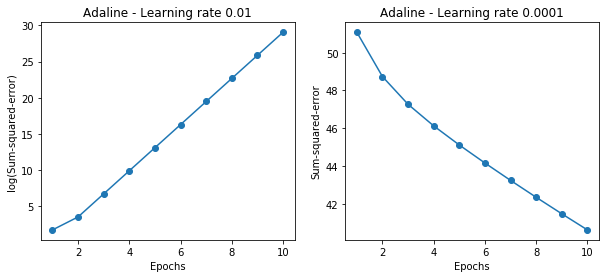

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

plt.show()

The left chart shows what could happen if we choose a learning rate that is too large. Instead of minimizing the cost function, the error becomes larger in every epoch, because we overshoot the global minimum. On the other hand, we can see that the cost decreases on the right plot, but the chosen learning rate is so small that the algorithm would require a very large number of epochs to converge to the global cost minimum.

左图中选择的学习率太大，导致错误无法收敛，反而越来越大；右图学习率过小，算法需要多次迭代才能收敛到全局最小值。

下图说明如果改变某个特定权重参数值来最小化代价函数$J$会发生什么情况。左图显示选择一个好的学习率，代价会逐渐降低，向全局最小的方向发展；右图显示如果选择的学习率太大，就会错过全局的最小值。

<img src="images/02_08.png" style="width:600px;"/>

### 2.3.3 通过调整特征大小改善梯度下降
梯度下降可以从特征调整中受益。本节使用称为`标准化`的特征尺度调整方法来加快收敛，它可以使数据具有`标准正态分布`的特性。

标准化可以改变每个特征的平均值以使其居中为零，而且每个特征的标准偏差为1。例如，标准化第$j$个特征，可以简单地从每个训练样本减去平均值，然后除以标准偏差$\sigma_j$：
+ $\displaystyle x_j = \frac{x_j - \eta_j}{\sigma_j}$

> Here, $x_j$ is a vector consisting of the $j_\text{th}$ feature values of all training samples $n$, and this standardization technique is applied to each feature $j$ in our dataset.

标准化有助于梯度下降学习的原因之一是优化器必须遍历几个步骤才能发现好的或者最优的解决方案（全局最小值），如下图所示，两个图形代表了代价的表面，是二元分类问题中两个模型权重的函数：

<img src="images/02_09.png" style="width:500px;"/>

用NumPy很容易实现标准化：

In [9]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

标准化完成之后，将再次训练Adaline，然后在学习率$\eta =0.01$的条件下， 经过几轮迭代后观察其现在的收敛情况：

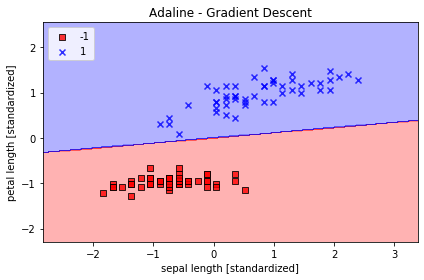

In [10]:
ada = AdalineGD(n_iter=15, eta=0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

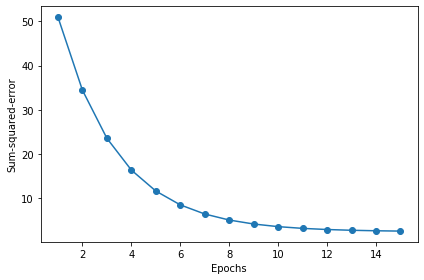

In [11]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()

从图中可以看到，Adaline在学习率$\eta = 0.01$的情况下，经过训练已经开始收敛。然而，即使所有的样本都可以分类正确，SSE仍然保持非零。

### 2.3.4 大规模机器学习与随机梯度下降
对于非常大的数据集，批量梯度下降在计算上相当昂贵，因为每向全局最小值走一步都需要重新评估整个训练集。

批量梯度下降算法的一种常用替代方法是`随机梯度下降法`，有时也被称为迭代或在线梯度下降法。批量梯度下降累积误差之和来更新权重：
+ $\displaystyle\Delta w_j = -\eta \frac{\partial J}{\partial w_j} =\eta \sum_i\bigg(y^{(i)}-\phi{(z^{(i)})} \bigg)x_j^{(i)}$

在随机梯度下降的每次迭代中，我们为每个训练样本逐渐更新权重：：
+ $\displaystyle \eta \bigg(y^{(i)}-\phi{(z^{(i)})} \bigg)x^{(i)}$

随机梯度下降可以被看作是梯度下降的近似，由于权重更新更加频繁，所以通常收敛得更快。由于每个梯度都是基于单个训练实例计算出来 的，误差表面比梯度下降更大，这也有优势，因为如果采用非线性代价函数，随机梯度下降更容易逃脱浅度局部极小值。要通过随机梯度下降获得满意的结果，很重要的一点是将训练数据以随机的顺序呈现出来，同时要把训练集重新洗牌以防止迭代循环。

> 在随机梯度下降实现过程中，通常不使用固定的学习率$\eta$，而是使用逐步下降的适应性学习率。

随机梯度下降的另外一个优点是可以在线学习。采用在线学习的方法，系统可以立即适应变化，而且在存储空间有限的情况下，可以在更新模型后丢弃训练数据。

> 批量梯度下降和随机梯度下降之间的折中就是所谓的`小批量学习`。`小批量学习`可以理解为对训练数据的较小子集采用批量梯度下降。`小批量梯度下降`的优点是可以通过更频繁的权重更新，实现快速收敛。

使用随机梯度下降对Adaline自适应学习规则做些调整。在调用`fit`方法的过程中，将在每个训练样本之后更新权重。此外，对在线学习，将在实现时调用额外 的`partial_fit`方法，不再重新初始化权重。为了检验算法在训练后是否收敛，将在每次迭代计算训练样本的平均代价。此外，将增加一个选项，在每次迭代开始之前，对训练数据重新洗牌以避免优化代价函数时重复循环。通过`random_state`参数，允许为反复训练定义随机种子：

In [12]:
class AdalineSGD(object):
    """
    Parameters
    ------------
    eta : float, Learning rate (between 0.0 and 1.0)
    n_iter : int, Passes over the training dataset.
    shuffle : bool (default: True), Shuffles training data every epoch if True to prevent cycles.
    random_state : int, Random number generator seed for random weight initialization.

    Attributes
    -----------
    w_ : 1d-array,  Weights after fitting.
    cost_ : list, Sum-of-squares cost function value averaged over all training samples in each epoch.
    """
    def __init__(self, eta=0.01, n_iter=10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
        
    def fit(self, X, y):
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self

    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=1 + m)
        self.w_initialized = True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

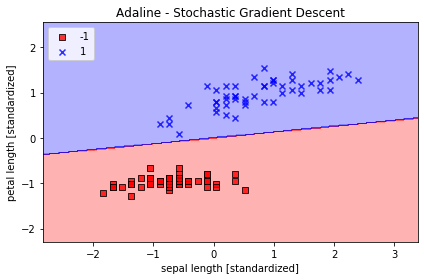

In [13]:
ada = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

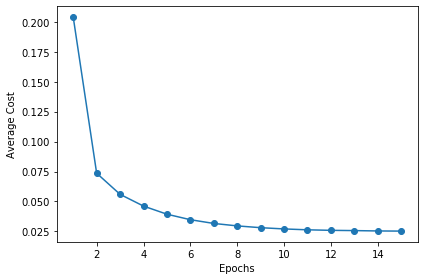

In [14]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

正如上图可以看到的，平均代价降低得非常快，在15次迭代后，最终的决策边界看起来与批量梯度Adaline的下降结果类似。如果要更新模型，例如，流式数据的在线学习，可以对单个样本直接调用`partial_fit`方法，例如，`ada.partial_fit(X_std[0,:]，y[0])`。